In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Problem Statement1 --filtering relevant columns from census_2011.csv
cendf=pd.read_csv("Data/census_2011.csv",usecols=["State name","District name","Population","Male","Female","Literate","Male_Literate","Female_Literate","Rural_Households","Urban_Households","Households","Age_Group_0_29","Age_Group_30_49","Age_Group_50","Age not stated"])


In [4]:
# Problem Statement 2: (Rename the Column names)

cendf=cendf.rename(columns={"State name":"State/UT","District name":"District","Male_Literate":"Literate_Male","Female_Literate":"Literate_Female","Rural_Households":"Households_Rural","Urban_ Households":"Households_Urban","Age_Group_0_29":"Young_and_Adult","Age_Group_30_49":"Middle_Aged","Age_Group_50":"Senior_Citizen","Age not stated":"Age_Not_Stated"})
cendf.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0


In [5]:
#Problem Statement 3: (Rename State/UT Names)
def conv(name):
    op=[]
    for word in name.split():
        if word.lower()=='and':
            op.append(word.lower())
        else:
            op.append(word.capitalize())
    return " ".join(op)
cendf['State/UT']=cendf['State/UT'].apply(conv)


In [6]:
cendf['State/UT'].head(5)

0    Jammu and Kashmir
1    Jammu and Kashmir
2    Jammu and Kashmir
3    Jammu and Kashmir
4    Jammu and Kashmir
Name: State/UT, dtype: object

In [7]:
#Problem Statement 4: (New State/UT formation)
with open('Data/Telangana.txt','r') as file:
    tdist=list(file.readlines())
tsdist=[]
for each in tdist:
    tsdist.append(each.replace('\n',''))
print(tsdist)

['Adilabad', 'Nizamabad', 'Karimnagar', 'Medak', 'Hyderabad', 'Rangareddy', 'Mahbubnagar', 'Nalgonda', 'Warangal', 'Khammam']


In [8]:
cendf['State/UT']=cendf.apply(lambda x: 'Telanagana' if x['District'] in tsdist else x['State/UT'],axis=1 )
cendf['State/UT'].value_counts()

Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Jammu and Kashmir              22
Haryana                        21
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Andhra Pradesh                 13
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Telanagana                     10
Manipur                         9
Nct Of Delhi                    9
Mizoram                         8
Meghalaya                       7
Tripura                         4
Sikkim                          4
Pondicherry   

In [9]:
cendf['State/UT']=cendf.apply(lambda x: 'Laddakh' if x['District'] in ['Leh(Ladakh)','Kargil'] else x['State/UT'],axis=1 )
cendf['State/UT'].value_counts()

Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Haryana                        21
Jammu and Kashmir              20
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Andhra Pradesh                 13
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Telanagana                     10
Nct Of Delhi                    9
Manipur                         9
Mizoram                         8
Meghalaya                       7
Pondicherry                     4
Tripura                         4
Sikkim        

In [10]:
#Problem Statement 5: (Find and process Missing Data)
cendf[cendf['State/UT']=="Laddakh"]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0


In [11]:
#Problem Statement 5: (Find and process Missing Data)
cendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UT          640 non-null    object 
 1   District          640 non-null    object 
 2   Population        610 non-null    float64
 3   Male              610 non-null    float64
 4   Female            607 non-null    float64
 5   Literate          604 non-null    float64
 6   Literate_Male     609 non-null    float64
 7   Literate_Female   613 non-null    float64
 8   Households_Rural  598 non-null    float64
 9   Urban_Households  607 non-null    float64
 10  Households        608 non-null    float64
 11  Young_and_Adult   609 non-null    float64
 12  Middle_Aged       610 non-null    float64
 13  Senior_Citizen    609 non-null    float64
 14  Age_Not_Stated    605 non-null    float64
dtypes: float64(13), object(2)
memory usage: 75.1+ KB


In [12]:
cendf.isnull().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Urban_Households    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [13]:
total_nulls_before_fill=cendf.isnull().sum().sum()

In [14]:
null_val_percent={cendf.columns[col]:(val/640)*100 for col,val in enumerate(cendf.isnull().sum())}
null_val_percent

{'State/UT': 0.0,
 'District': 0.0,
 'Population': 4.6875,
 'Male': 4.6875,
 'Female': 5.15625,
 'Literate': 5.625,
 'Literate_Male': 4.84375,
 'Literate_Female': 4.21875,
 'Households_Rural': 6.5625,
 'Urban_Households': 5.15625,
 'Households': 5.0,
 'Young_and_Adult': 4.84375,
 'Middle_Aged': 4.6875,
 'Senior_Citizen': 4.84375,
 'Age_Not_Stated': 5.46875}

In [15]:
# Population = Male + Female
# Literate = Literate_Male + Literate_Female
# Population = Young_and_Adult+ Middle_Aged + Senior_Citizen + Age_Not_Stated
# Households = Households_Rural + Households_Urban


In [16]:
#Population = Male + female
df=cendf.fillna(0)
cendf['Population'] = df.apply(lambda x : x['Population'] if x['Population'] else x['Male']+x['Female'],axis=1)
cendf['Population'].isna().sum()

0

In [17]:
# Literate = Literate_Male + Literate_Female
cendf['Literate'] = df.apply(lambda x : x['Literate'] if x['Literate'] else x['Literate_Male']+x['Literate_Female'],axis=1)
cendf['Literate'].isna().sum()

0

In [18]:
# Households = Households_Rural + Households_Urban
cendf['Households'] = df.apply(lambda x : x['Households'] if x['Households'] else x['Households_Rural']+x['Urban_Households'],axis=1)
cendf['Households'].isna().sum()

0

In [19]:
cendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UT          640 non-null    object 
 1   District          640 non-null    object 
 2   Population        640 non-null    float64
 3   Male              610 non-null    float64
 4   Female            607 non-null    float64
 5   Literate          640 non-null    float64
 6   Literate_Male     609 non-null    float64
 7   Literate_Female   613 non-null    float64
 8   Households_Rural  598 non-null    float64
 9   Urban_Households  607 non-null    float64
 10  Households        640 non-null    float64
 11  Young_and_Adult   609 non-null    float64
 12  Middle_Aged       610 non-null    float64
 13  Senior_Citizen    609 non-null    float64
 14  Age_Not_Stated    605 non-null    float64
dtypes: float64(13), object(2)
memory usage: 75.1+ KB


In [20]:
total_nulls_after_fill=cendf.isna().sum().sum()
total_nulls_after_fill

323

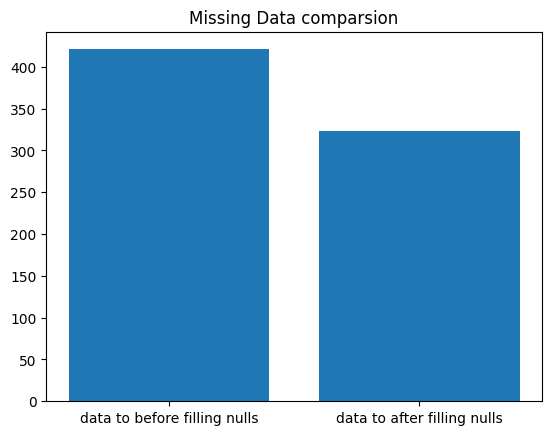

In [21]:
plt.bar(["data to before filling nulls","data to after filling nulls"],[total_nulls_before_fill,total_nulls_after_fill])
plt.title("Missing Data comparsion")
plt.show()

In [22]:
#Problem Statement: 6
# Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.
# Extract Information from the housing data along with the census data
# Siddhu, from Healthcare Department, has reported that the household data that they have (Data/housing.csv), requires some processing in the context of the census data so that more information can be extracted from it. 
# Process the housing data and census data to gain some insight.
# */

In [23]:
# updating the state names in housing data

In [24]:
new_names = {'PONDICHERRY': 'PUDUCHERRY', 'ORISSA': 'ODISHA', 'NCT OF DELHI': 'DELHI'}
cendf['State/UT'] = cendf['State/UT'].apply(lambda x: new_names[x.upper()] if x.upper() in new_names.keys() else x.upper())
cendf.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,LADDAKH,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,LADDAKH,Kargil,140802.0,NaN,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [25]:
# saving the cleaned data
cendf.to_csv('CleanData/fine_census.csv',index=False)